# Hotel Booking Analysis

## Introduction

### 1.1 Problem Statement
In the dynamic and competitive hospitality industry, understanding customer behavior and preferences is crucial for the success of any hotel business. This analysis focuses on differentiating booking patterns and customer preferences between two types of hotels: a city hotel (H2) and a resort hotel (H1). The aim is to understand how various factors, such as lead time, stay duration, and time of the year, influence booking behaviors, which is vital for hotel managers and stakeholders to tailor their services and marketing strategies effectively.

### 1.2 Approach to Address the Problem
To address this problem, we will utilize a dataset containing booking information for both a city hotel and a resort hotel. This analysis involves:
- **Data Preparation**: Cleaning and preparing the dataset for analysis.
- **Exploratory Data Analysis (EDA)**: Conducting an in-depth analysis to uncover patterns and trends in booking data, focusing on cancellation trends, booking lead time, seasonal trends, length of stay, and guest composition.
- **Comparative Analysis**: Comparing patterns between the city hotel and resort hotel to understand differing customer behaviors.

### 1.3 Proposed Analytic Techniques
Our analytic approach will employ several techniques, including:
- **Trend Analysis**: Observing how bookings and cancellations trend over time.
- **Correlation Analysis**: Identifying relationships between lead time, length of stay, and cancellation rates.
- **Comparative Analysis**: Contrasting the city hotel and resort hotel data to highlight unique patterns in each.
- **Cluster Analysis (Optional)**: Segmenting customers based on booking patterns and demographics, if applicable.

### 1.4 Consumer Benefit
The analysis will provide actionable insights to help:
- **Reduce Cancellation Rates**: Understanding predictors of cancellations to devise strategies for reduction.
- **Tailor Marketing Efforts**: Recognizing peak booking periods and typical guest profiles for targeted promotions.
- **Resource Allocation**: Predicting busy periods for better management of staffing and inventory.
- **Customize Guest Experiences**: Enhancing personalization in services by understanding guest preferences.

This analysis aims to turn data into actionable strategies in the hotel industry, ensuring that our findings are not only comprehensive but also directly relevant to key operational areas.


In [5]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/Aatman/Downloads/hotel_bookings.csv'  # Replace with your file path
hotel_data = pd.read_csv(file_path)

# Handling Missing Values
# Filling missing 'children' values with the median
hotel_data['children'].fillna(hotel_data['children'].median(), inplace=True)

# Replacing missing 'country' with 'Unknown' and missing 'agent' with 0 (as a placeholder)
hotel_data['country'].fillna('Unknown', inplace=True)
hotel_data['agent'].fillna(0, inplace=True)

# Converting 'children' to integer type
hotel_data['children'] = hotel_data['children'].astype(int)

# Outlier Detection and Handling
# Detecting and removing outliers for 'lead_time'
Q1 = hotel_data['lead_time'].quantile(0.25)
Q3 = hotel_data['lead_time'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR
hotel_data = hotel_data[hotel_data['lead_time'] <= Q3 + outlier_threshold]

# Removing top 1% of values from 'adr' as outliers
hotel_data = hotel_data[hotel_data['adr'] <= hotel_data['adr'].quantile(0.99)]

# Displaying the cleaned dataset overview
print("Shape of cleaned dataset:", hotel_data.shape)
print("Total missing values:", hotel_data.isnull().sum().sum())

Save the cleaned data to a new CSV file (optional)
hotel_data.to_csv('cleaned_hotel_data.csv', index=False)

# [Previous cleaning steps here]

# Displaying the first few rows of the cleaned dataset
print("Cleaned Dataset Head:")
print(hotel_data.head())
# [Previous cleaning steps here]

# Displaying the first few rows of the cleaned dataset
print("Cleaned Dataset Head:")
print(hotel_data.head())


SyntaxError: invalid syntax (663864638.py, line 33)

In [6]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/Aatman/Downloads/hotel_bookings.csv'  # Replace with your file path
hotel_data = pd.read_csv(file_path)

# Handling Missing Values
# Filling missing 'children' values with the median
hotel_data['children'].fillna(hotel_data['children'].median(), inplace=True)

# Replacing missing 'country' with 'Unknown' and missing 'agent' with 0 (as a placeholder)
hotel_data['country'].fillna('Unknown', inplace=True)
hotel_data['agent'].fillna(0, inplace=True)

# Converting 'children' to integer type
hotel_data['children'] = hotel_data['children'].astype(int)

# Outlier Detection and Handling
# Detecting and removing outliers for 'lead_time'
Q1 = hotel_data['lead_time'].quantile(0.25)
Q3 = hotel_data['lead_time'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR
hotel_data = hotel_data[hotel_data['lead_time'] <= Q3 + outlier_threshold]

# Removing top 1% of values from 'adr' as outliers
hotel_data = hotel_data[hotel_data['adr'] <= hotel_data['adr'].quantile(0.99)]

# Displaying the cleaned dataset overview
print("Shape of cleaned dataset:", hotel_data.shape)
print("Total missing values:", hotel_data.isnull().sum().sum())

# Displaying the first few rows of the cleaned dataset
print("\nCleaned Dataset Head:")
print(hotel_data.head())

# Save the cleaned data to a new CSV file (optional)
# Uncomment the line below to save the dataset
# hotel_data.to_csv('cleaned_hotel_data.csv', index=False)


Shape of cleaned dataset: (115221, 32)
Total missing values: 108429

Cleaned Dataset Head:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_ty

In [8]:
# Generate summary information for categorical variables
categorical_columns = hotel_data.select_dtypes(include=['object']).columns
categorical_summary = hotel_data[categorical_columns].describe(include=['object'])
print(categorical_summary)


             hotel arrival_date_month    meal country market_segment  \
count       115221             115221  115221  115221         115221   
unique           2                 12       5     176              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         76453              12854   89335   46061          55697   

       distribution_channel reserved_room_type assigned_room_type  \
count                115221             115221             115221   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  94170              82931              71128   

       deposit_type customer_type reservation_status reservation_status_date  
count        115221        115221             115221                  115221  
unique            3             4                  3                     926  
top      No Deposit     Transient          Check-Out    

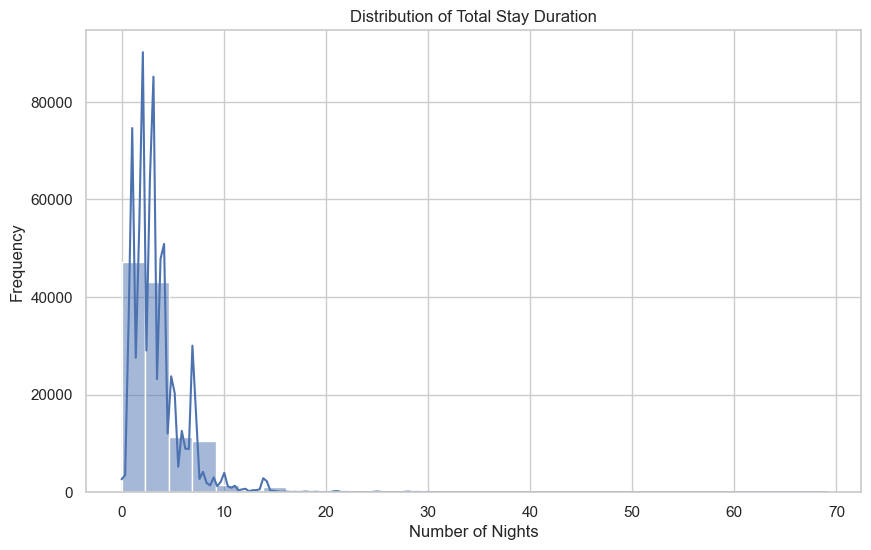

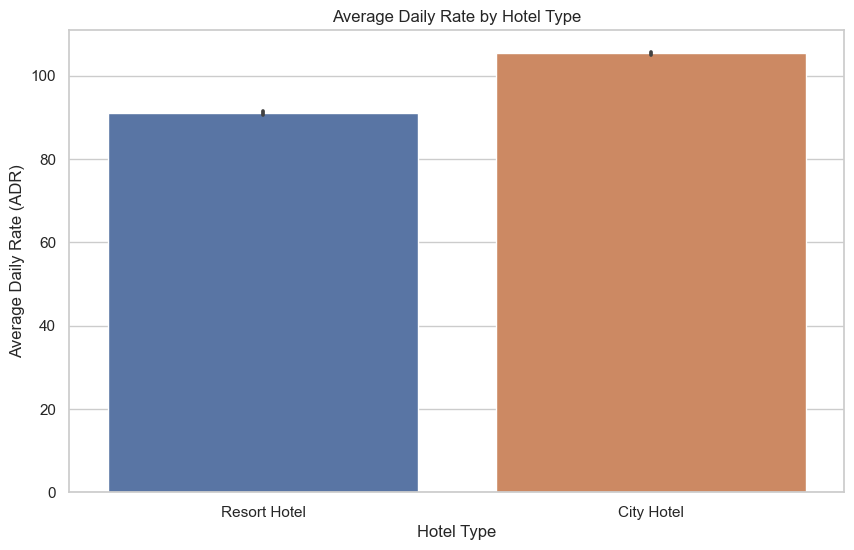

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating new variables
# Total stay duration
hotel_data['total_stay'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']
# Total number of guests
hotel_data['total_guests'] = hotel_data['adults'] + hotel_data['children'] + hotel_data['babies']

# Basic Exploration
# Distribution of total stay duration
plt.figure(figsize=(10, 6))
sns.histplot(hotel_data['total_stay'], bins=30, kde=True)
plt.title('Distribution of Total Stay Duration')
plt.xlabel('Number of Nights')
plt.ylabel('Frequency')
plt.show()

# Average Daily Rate (ADR) by hotel type
plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='adr', data=hotel_data)
plt.title('Average Daily Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

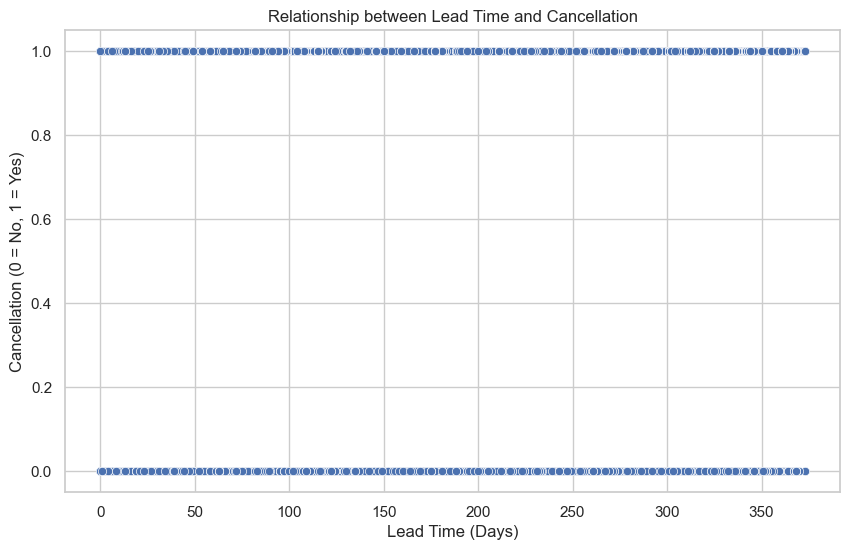

Average Number of Guests by Hotel Type:
          hotel  total_guests
0    City Hotel      1.942592
1  Resort Hotel      1.985478


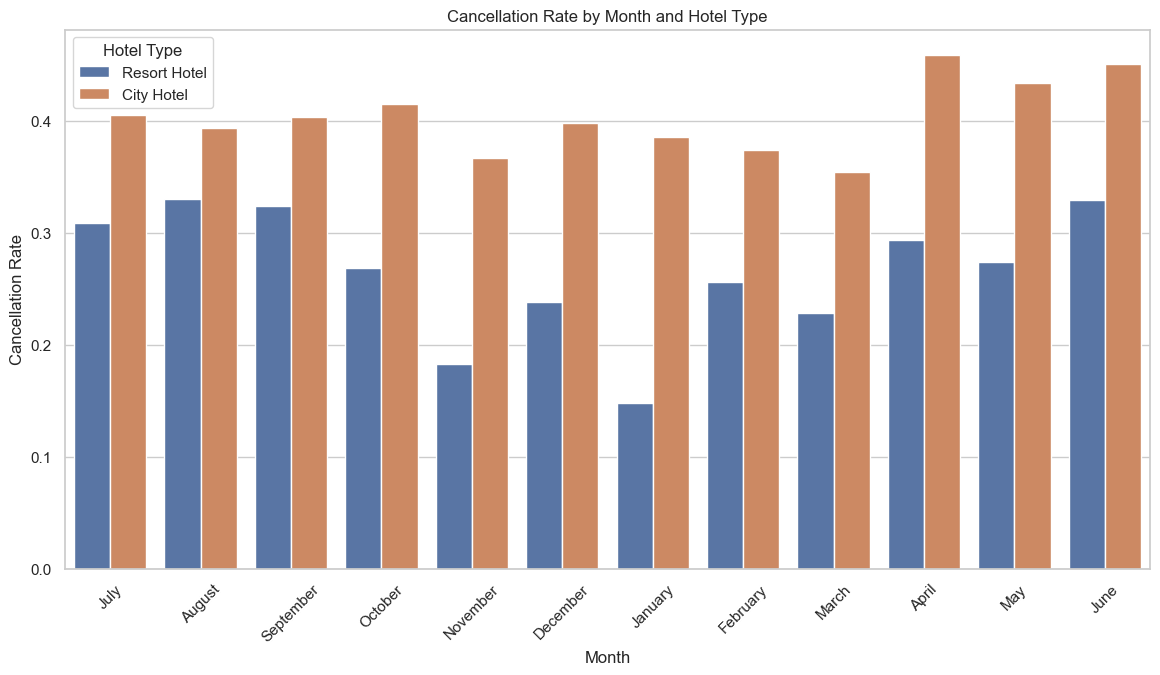

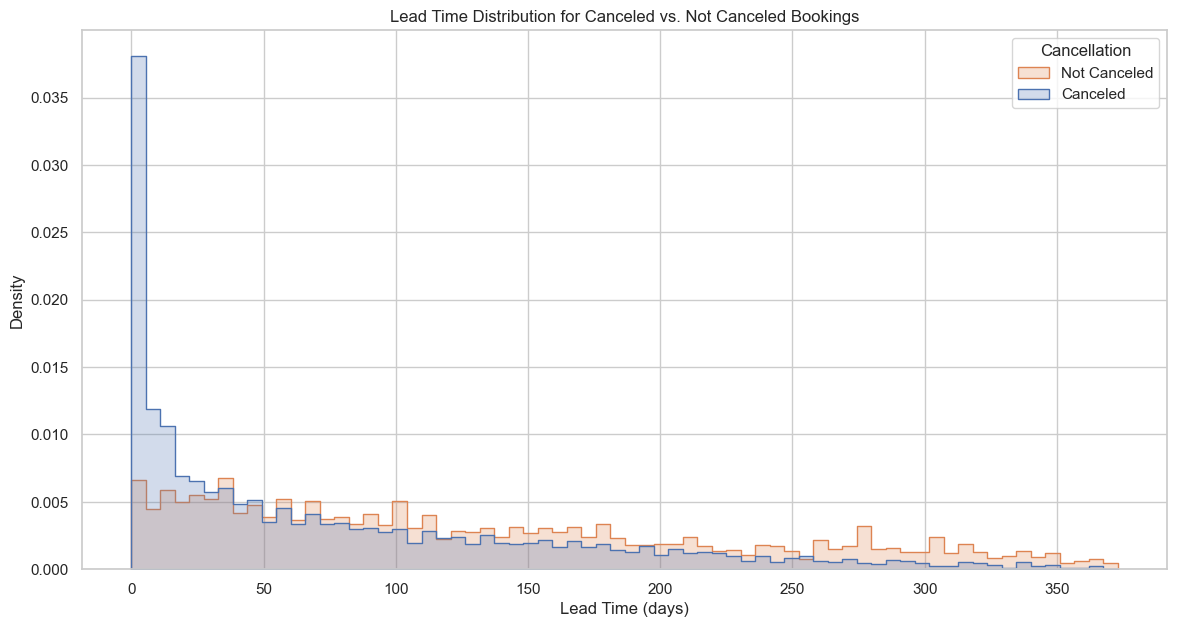

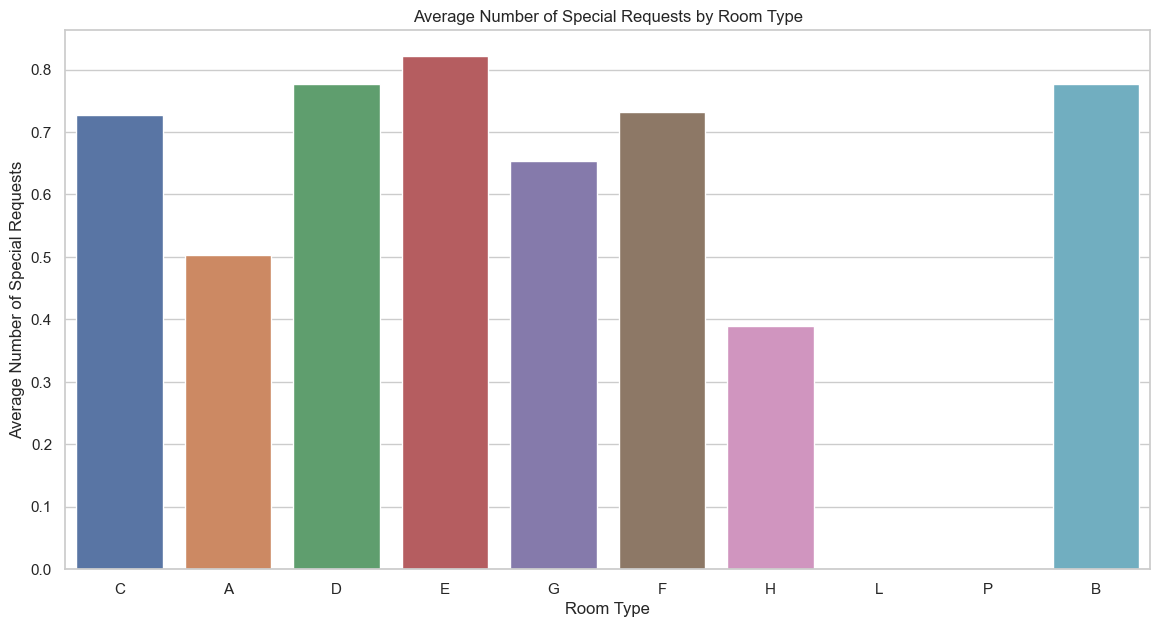

C:\Users\Aatman\AppData\Local\Temp\ipykernel_22184\1034904058.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hotel_data.corr()


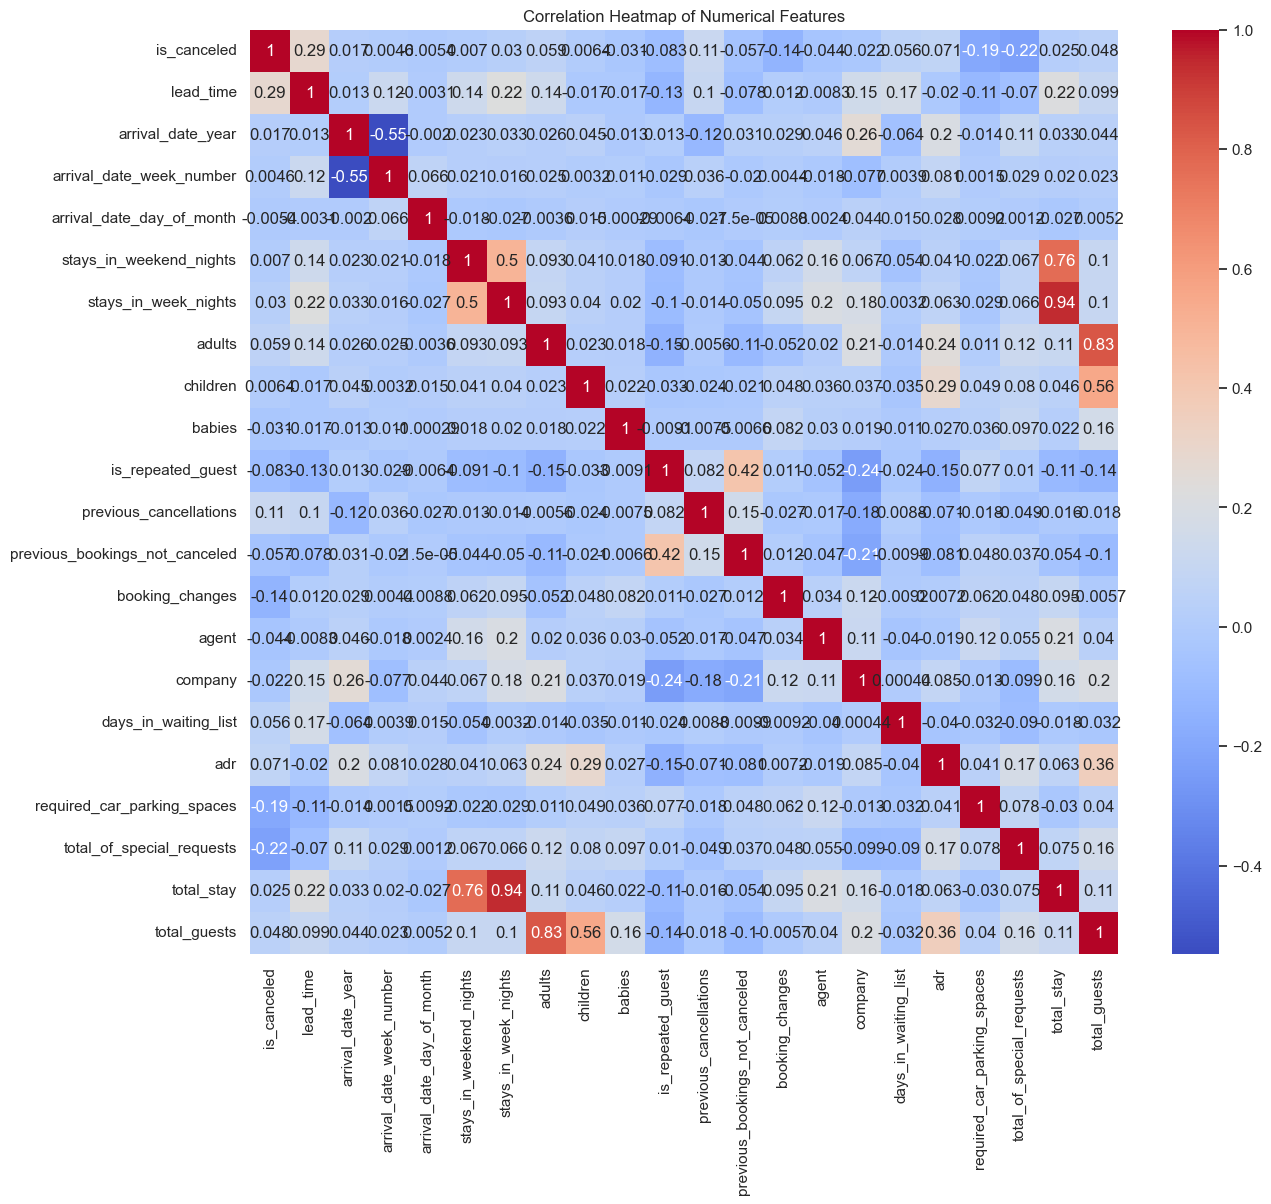

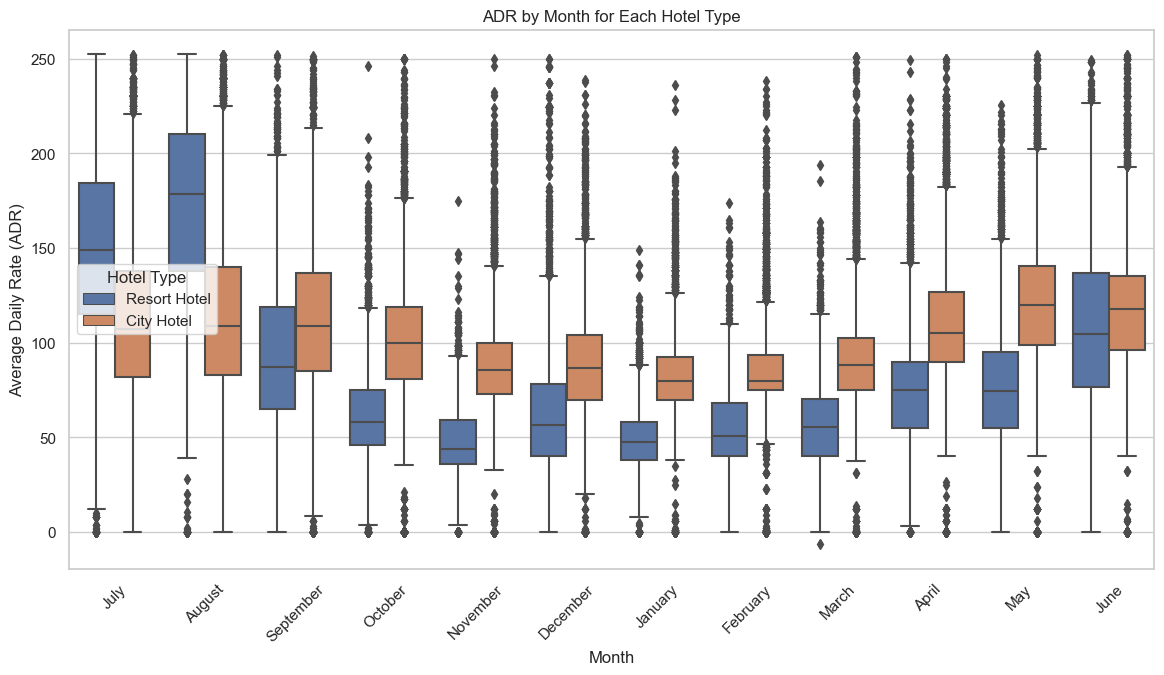

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# 1. Cancellation Rates by Month
plt.figure(figsize=(14, 7))
sns.barplot(x='arrival_date_month', y='is_canceled', hue='hotel', data=hotel_data, errorbar=None)
plt.xticks(rotation=45)
plt.title('Cancellation Rate by Month and Hotel Type')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.legend(title='Hotel Type')
plt.show()

# 2. Lead Time Distribution for Canceled vs. Not Canceled Bookings
plt.figure(figsize=(14, 7))
sns.histplot(data=hotel_data, x='lead_time', hue='is_canceled', element='step', stat='density', common_norm=False)
plt.title('Lead Time Distribution for Canceled vs. Not Canceled Bookings')
plt.xlabel('Lead Time (days)')
plt.ylabel('Density')
plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.show()

# 3. Average Number of Special Requests by Room Type
plt.figure(figsize=(14, 7))
sns.barplot(x='reserved_room_type', y='total_of_special_requests', data=hotel_data, errorbar=None)
plt.title('Average Number of Special Requests by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Special Requests')
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = hotel_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 5. Boxplot of ADR by Month for Each Hotel Type
plt.figure(figsize=(14, 7))
sns.boxplot(x='arrival_date_month', y='adr', hue='hotel', data=hotel_data)
plt.xticks(rotation=45)
plt.title('ADR by Month for Each Hotel Type')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Hotel Type')
plt.show()
